In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# Cardio

In [2]:
# Lectura de datos
cardio_alco = pd.read_csv("cardio_alco.csv", sep = ";")
cardio_base = pd.read_csv("cardio_base.csv")

In [3]:
cardio_base.shape

(70000, 9)

Filas: 70000

Columnas: 10

In [4]:
cardio_base.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000


In [5]:
# Preprocesamiento
# cardio_base["gender"] = pd.Categorical(cardio_base["gender"])
# cardio_base["smoke"] = pd.Categorical(cardio_base["smoke"])
# cardio_base["cholesterol"] = pd.Categorical(cardio_base["cholesterol"])
cardio_base["age_years"] = cardio_base["age"]//365
cardio_base["ap_mean"] = (cardio_base["ap_hi"] + cardio_base["ap_lo"])/2

In [6]:
cardio_base.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years,ap_mean
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,0.088129,52.840671,112.723850
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.283484,6.766774,122.653208
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,0.000000,29.000000,-35.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,0.000000,48.000000,100.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,0.000000,53.000000,100.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,0.000000,58.000000,110.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,1.000000,64.000000,8050.000000


In [7]:
# Datos faltantes
cardio_base.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
smoke          0
age_years      0
ap_mean        0
dtype: int64

In [8]:
print(cardio_base["gender"].value_counts(normalize = 1))
cardio_base["smoke"].value_counts(normalize = 1)

gender
1    0.650429
2    0.349571
Name: proportion, dtype: float64


smoke
0    0.911871
1    0.088129
Name: proportion, dtype: float64

* Se identifican proporciones de  género y de fumadores
* Se destacan categorias muy desbalanceadas para los fumadores

# Análisis univariado

## Categoricas


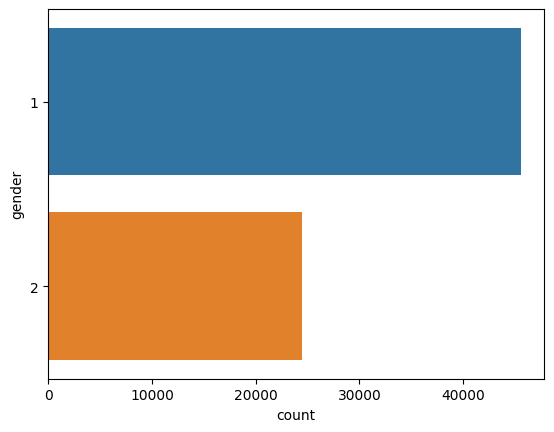

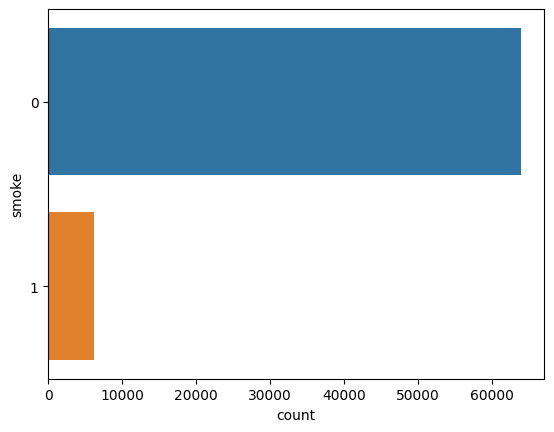

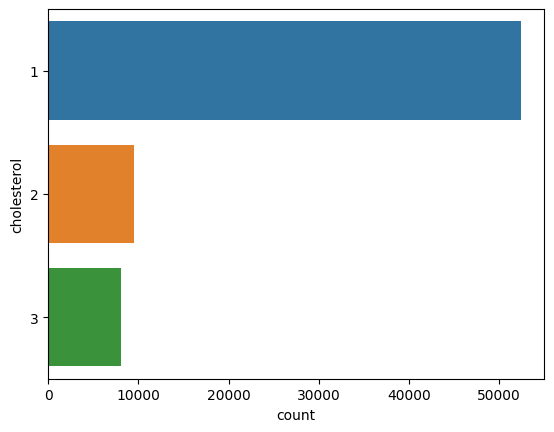

In [9]:
for i in ["gender", "smoke", "cholesterol"]:
    sns.countplot(y = i, data = cardio_base)
    plt.show()


## Numéricas

In [10]:
numeric_cols = cardio_base.select_dtypes(include = ['int', 'float', 'float64']).columns
numeric_cols = numeric_cols[1:]
numeric_cols

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'smoke', 'age_years', 'ap_mean'],
      dtype='object')

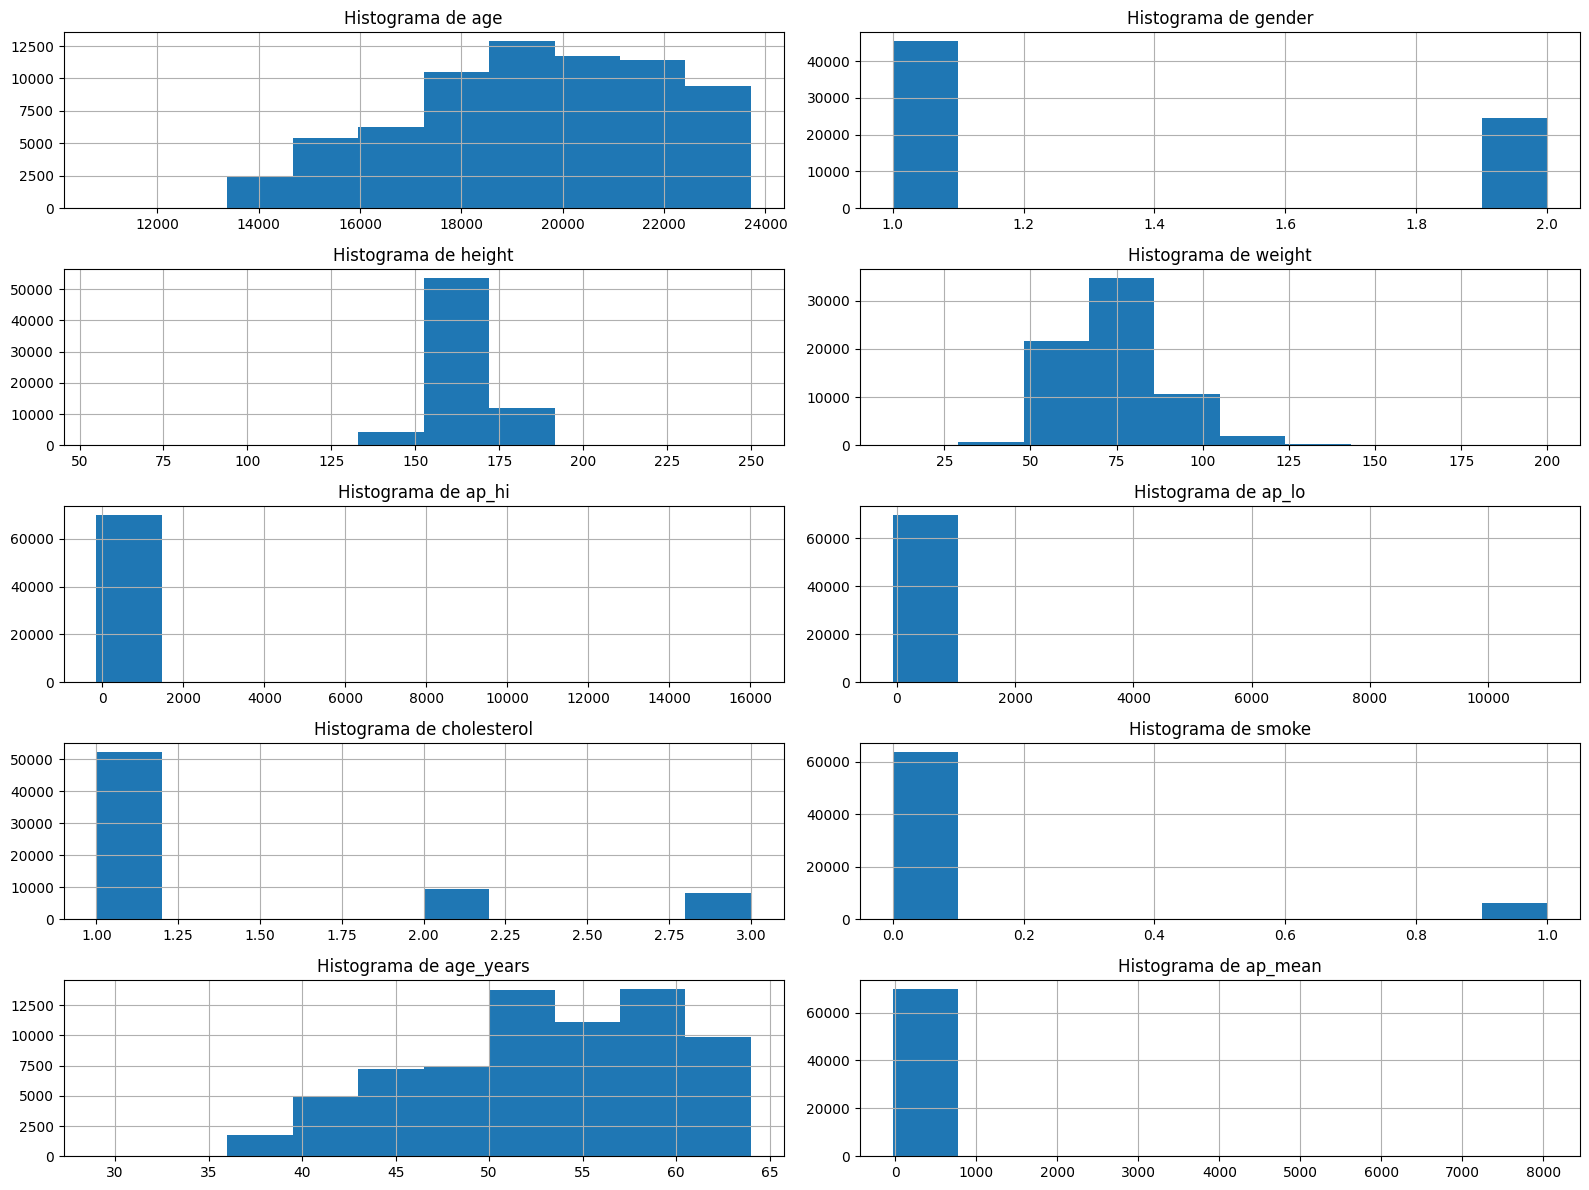

In [11]:
# Definir el número de columnas y filas para la cuadrícula
numeric_cols = cardio_base.select_dtypes(include=['int', 'float']).columns
numeric_cols = numeric_cols[1:]
num_cols = 2  # Puedes ajustar este valor según tus preferencias
num_rows = (len(numeric_cols) - 1) // num_cols + 1

# Crear una nueva figura y ejes para la cuadrícula de subtramas
fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, 12))

# Iterar sobre las columnas numéricas y mostrar histogramas
for idx, col in enumerate(numeric_cols):
    if col == "id":
        continue  # Saltar la columna 'id'

    # Calcular la posición en la cuadrícula de subtramas
    row_idx = idx // num_cols
    col_idx = idx % num_cols

    # Seleccionar el eje adecuado de la cuadrícula de subtramas
    if num_rows == 1:
        ax = axes[col_idx]
    else:
        ax = axes[row_idx, col_idx]

    # Graficar el histograma en el eje seleccionado
    ax.hist(cardio_base[col])
    ax.grid(True)
    ax.set_title(f"Histograma de {col}")

# Ajustar el espaciado entre subtramas y mostrar la figura
plt.tight_layout()
plt.show()

* Se puede asumir que la poblacion tiene una edad entre los 50 y 55 años (de manera descriptiva)
* Las variables asociadas a medidas cardiovasculares (ap_lo y ap_li) parecen estar infladas en cero
* Tanto las estatura como el peso siguen valores similares a una distribución normal

In [12]:
cardio_base[numeric_cols].corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,age_years,ap_mean
age,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,-0.047633,0.999091,0.026595
gender,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,0.338135,-0.022913,0.015490
height,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,0.187989,-0.081506,0.008171
weight,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.067780,0.053561,0.052859
ap_hi,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,-0.000922,0.020854,0.640192
ap_lo,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.005186,0.017620,0.778414
cholesterol,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.010354,0.154012,0.033383
smoke,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,1.000000,-0.047649,0.003406
age_years,0.999091,-0.022913,-0.081506,0.053561,0.020854,0.017620,0.154012,-0.047649,1.000000,0.026630
ap_mean,0.026595,0.015490,0.008171,0.052859,0.640192,0.778414,0.033383,0.003406,0.026630,1.000000


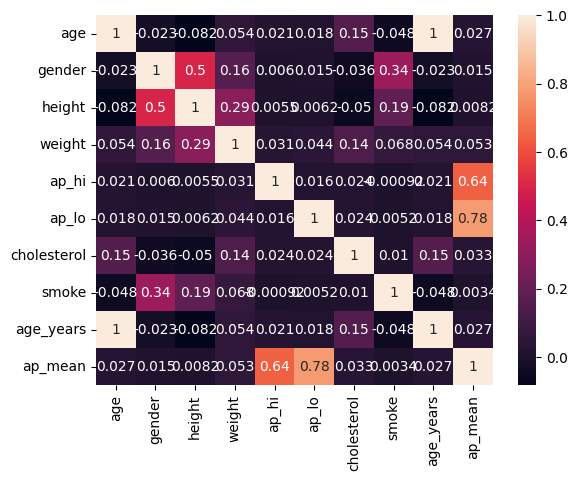

In [13]:
sns.heatmap(cardio_base[numeric_cols].corr(), annot = True)
plt.show()

# Multivariado

C:\Users\usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


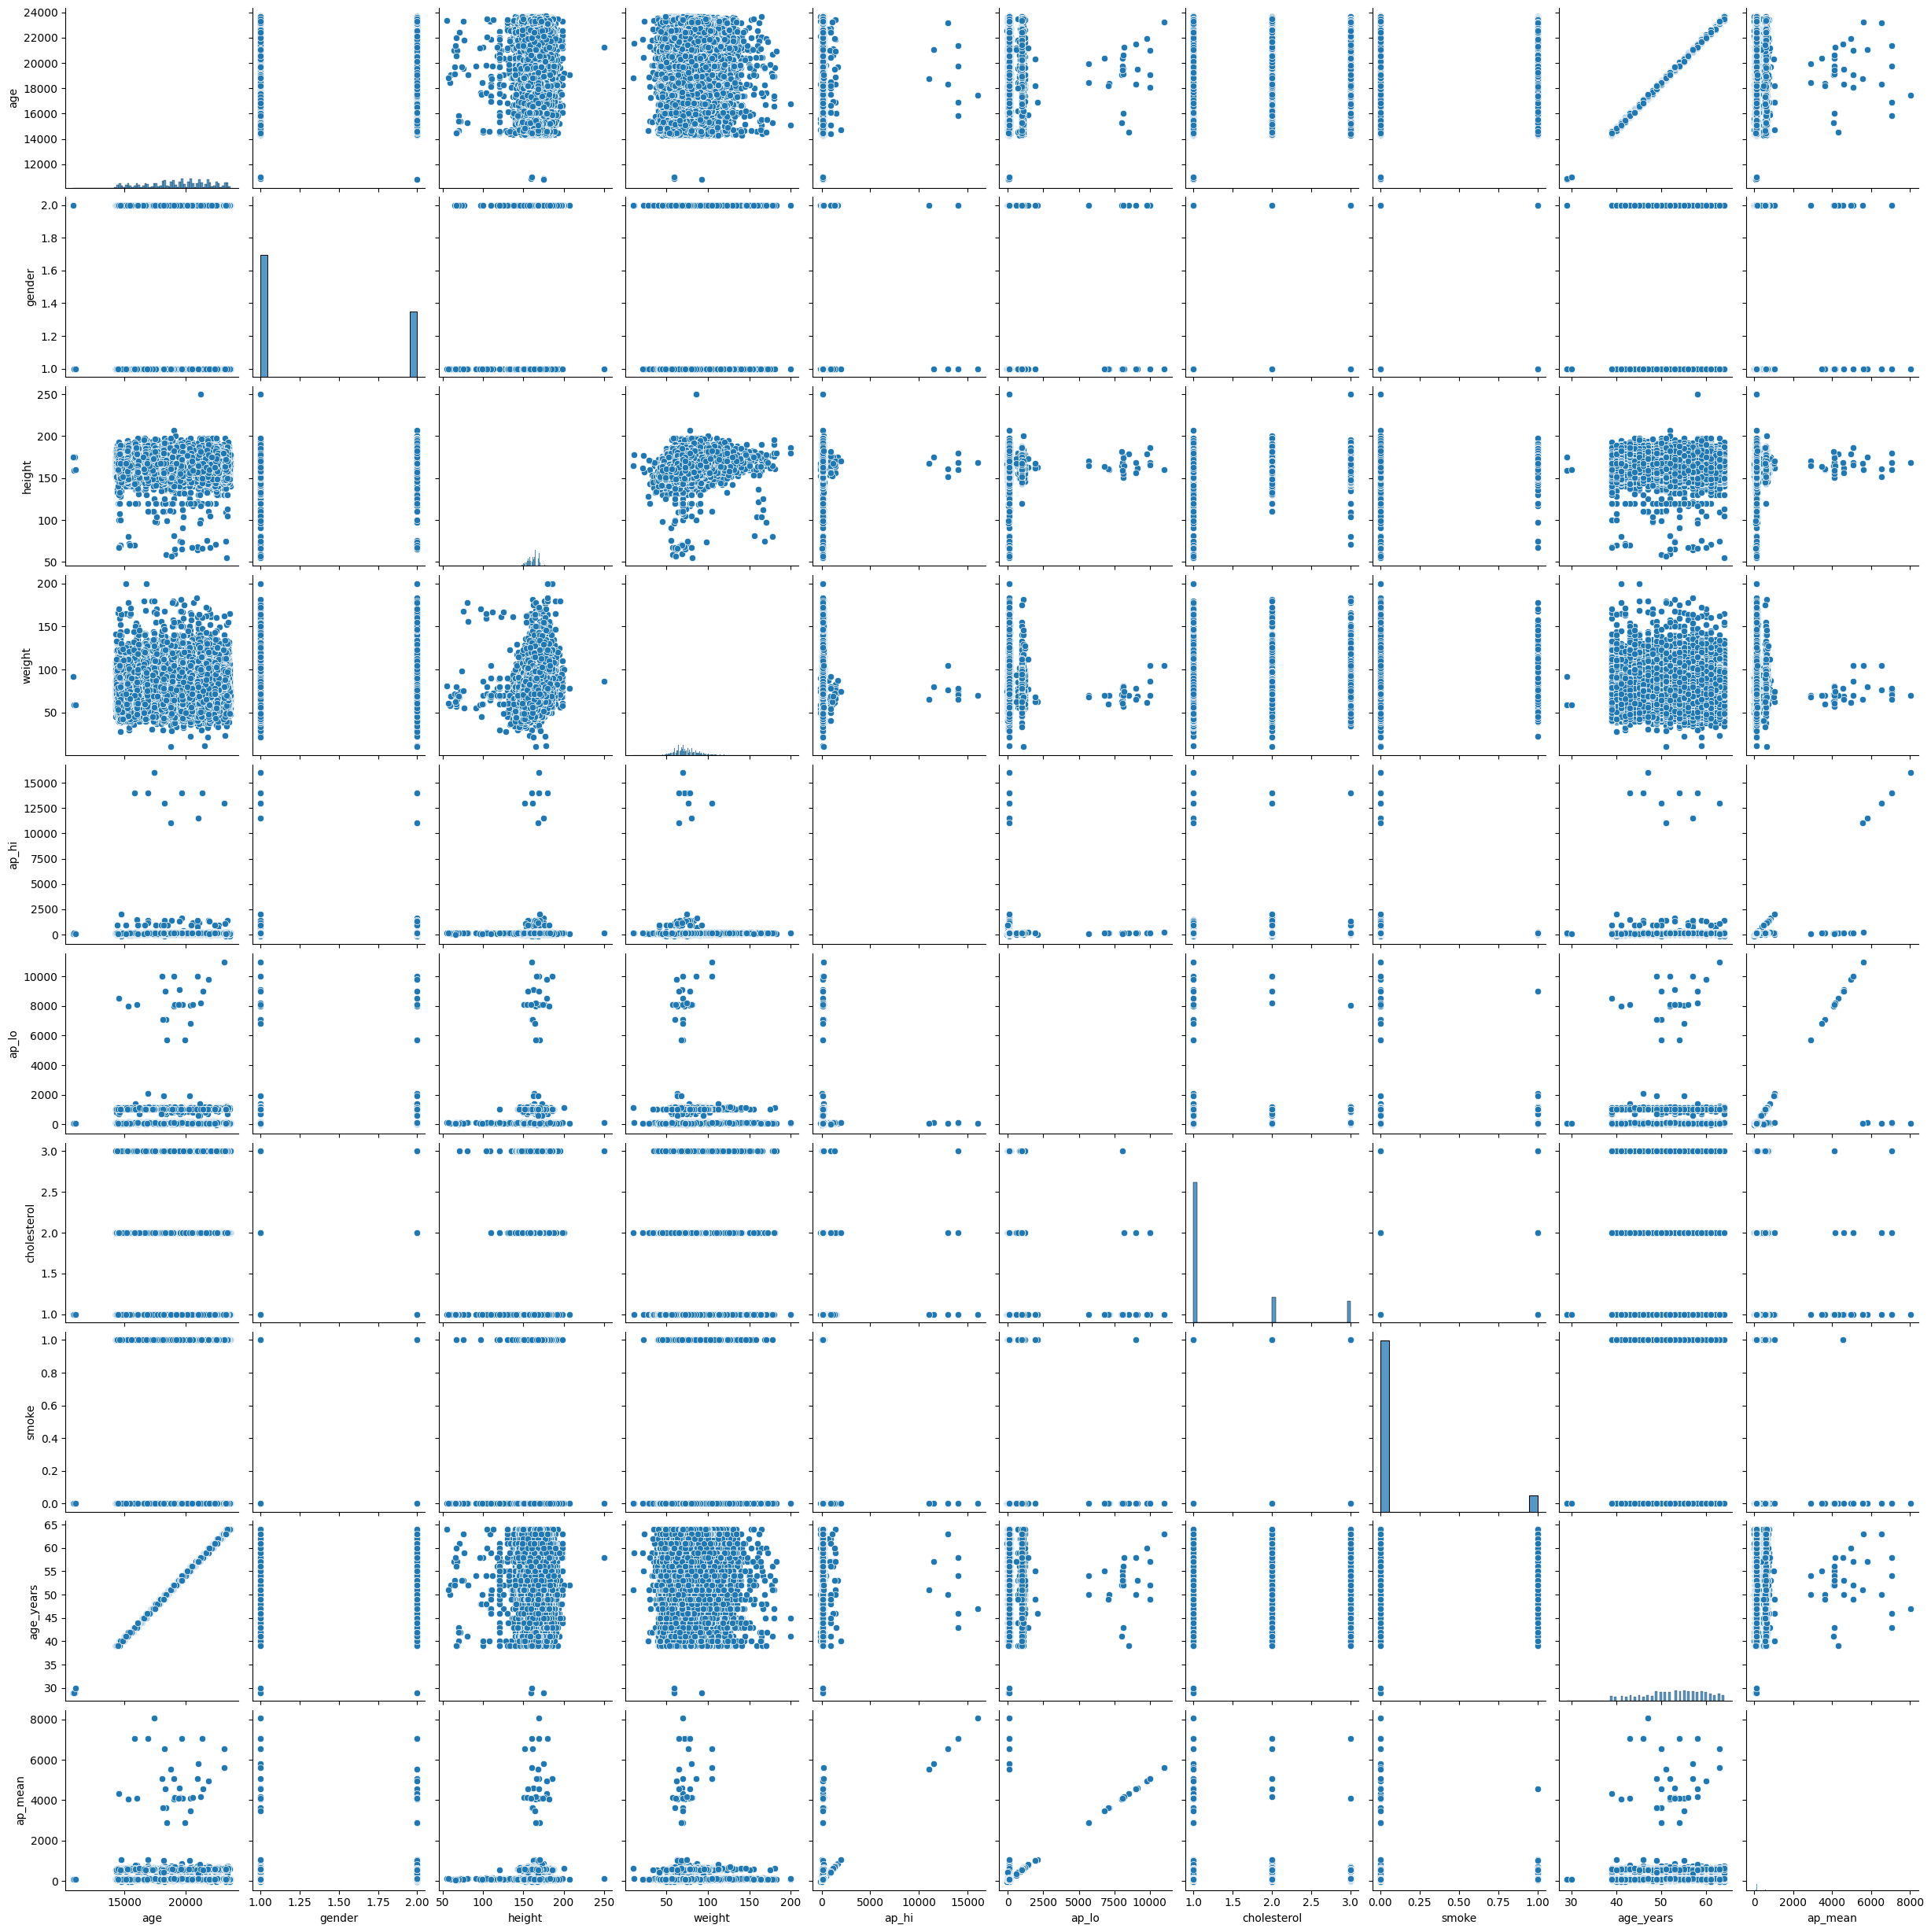

In [14]:
sns.pairplot(cardio_base.drop(columns = ["id"]))

In [15]:
print(cardio_base.columns)
cardio_alco.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'smoke', 'age_years', 'ap_mean'],
      dtype='object')


Index(['id', 'alco'], dtype='object')

In [16]:
cardio_alco.shape

(56903, 2)

# Preguntas
### 1) ¿Cuánto más pesa el grupo de edad con el peso promedio más alto respecto al grupo de edad con peso promedio más bajo?

In [17]:
par_gvas = cardio_base.groupby("age_years").agg(avg_age = ("weight", "mean"))
print(par_gvas.max()/par_gvas.min() - 1) # diferencia relativa
par_gvas.max() - par_gvas.min() # Diferencia absoluta

avg_age    0.285995
dtype: float64


avg_age    16.873721
dtype: float64

### 2) ¿Las personas mayores de 50 años tienes mayores valores en el colesterol?

In [18]:
cardio_base_young = cardio_base[cardio_base["age_years"] <= 50]
cardio_base_old = cardio_base[cardio_base["age_years"] > 50]

In [19]:
print(cardio_base_young.cholesterol.value_counts(normalize=True))
cardio_base_old.cholesterol.value_counts(normalize=True)

cholesterol
1    0.812061
2    0.127838
3    0.060102
Name: proportion, dtype: float64


cholesterol
1    0.713785
3    0.145146
2    0.141069
Name: proportion, dtype: float64

In [20]:
# Solucion de kaggle
# avg_cholesterol_by_age = cardio_base.groupby('age').agg({'cholesterol': 'mean'})
# avg_cholesterol_by_age[avg_cholesterol_by_age.index > 50].mean() / avg_cholesterol_by_age[avg_cholesterol_by_age.index <= 50].mean() - 1

### 3) ¿Es más que probable que los hombres fumen más que las mujeres?

In [125]:
print(pd.crosstab(cardio_base["gender"], cardio_base["smoke"]))
pd.crosstab(cardio_base["gender"], cardio_base["smoke"], normalize = True)

smoke       0     1
gender             
1       44717   813
2       19114  5356


smoke,0,1
gender,,
1,0.638814,0.011614
2,0.273057,0.076514


In [22]:
# Kaggle
num_smoker_by_gender = cardio_base.groupby('gender').agg({'smoke': 'sum'})
# num_smoker_by_gender
# num_smoker_by_gender[num_smoker_by_gender.index == 1]['smoke']
num_smoker_by_gender[num_smoker_by_gender.index == 2]['smoke'].item() / num_smoker_by_gender[num_smoker_by_gender.index == 1]['smoke'].item()

6.587945879458794

**Nota:** Suponiendo que 1 es hombre y 2 es mujer, las mujeres fuman más que los hombres

### 4) ¿Qué tan altos son las personas del 1% más altas?

In [23]:
cardio_base["height"].quantile(0.99)

184.0

* El 1% más alto representa a una población cuya estatura es mayor o igual a 184 cm

### 5) ¿Cuáles son las variables que tienen el coeficiente de correlación de spearman más alto?

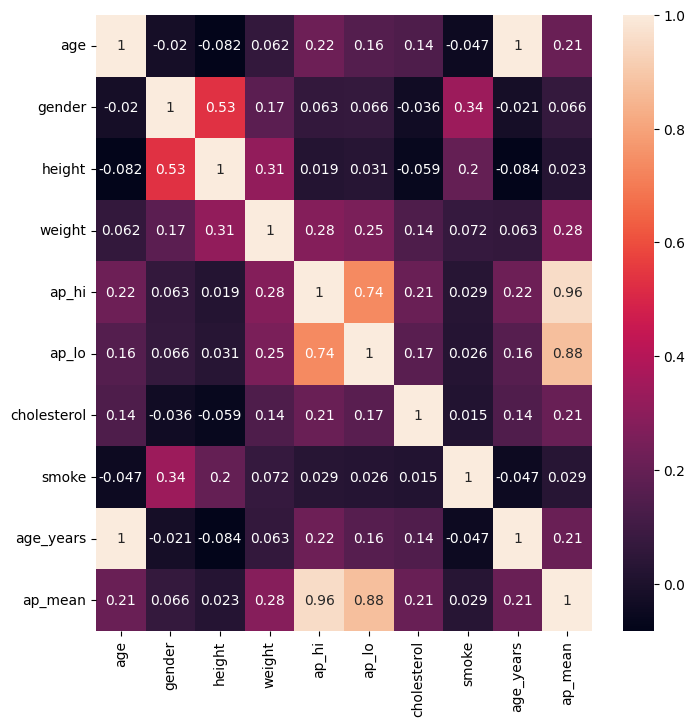

In [24]:
plt.figure(figsize = (8, 8))
sns.heatmap(cardio_base[numeric_cols].corr(method = "spearman"), annot = True)
plt.show()

* ap_lo y ap_hi con 0.74

### 6) ¿Que porcentaje de personas están a más de dos desviaciones del promedio de la estatura?

In [25]:
avg_height = cardio_base.height.mean()
sd_height = cardio_base.height.std()
cardio_base[(cardio_base.height > avg_height + 2*sd_height) | (cardio_base.height < avg_height - 2*sd_height)].shape[0]/cardio_base.shape[0]

0.033357142857142856

### 7) ¿Qué porcentaje de la población mayor a 50 años consume alcohol?

In [26]:
cardio_full = pd.merge(cardio_base, cardio_alco, how = "inner", on = "id")
cardio_full[(cardio_full.alco == 1) & (cardio_full.age_years > 50)].shape[0]/cardio_full[cardio_full.age_years > 50].shape[0]

0.049086076910560286

In [27]:
cardio_over_50_df = cardio_full[cardio_full['age_years'] > 50]
# cardio_over_50_df
len(cardio_over_50_df[cardio_over_50_df['alco'] == 1]) / len(cardio_over_50_df)

0.049086076910560286

### 8) ¿Cuál de las siguientes frases u oraciones son ciertas con un 95% de confianza?
* Smokers have higher blood presure than non-smokers: pvalue = 0.8073, No porque son iguales
* Smokers have higher cholesterol level than non-smokers: pvalue = -0.00707, Sí.
* Smokers weight less than non smokers: pvalue = 3.1083870241066657e-72, No.
* Men have higher blood pressure than women: pvalue = 4.153878951366261e-05, Sí.

In [28]:
import statsmodels.api as sm

In [29]:
# Inciso 1
non_smokers = cardio_base[cardio_base.smoke == 0]
smokers = cardio_base[cardio_base.smoke == 1]
print(sm.stats.ztest(non_smokers.ap_mean, smokers.ap_mean))
sm.stats.zconfint(non_smokers.ap_mean, smokers.ap_mean)

(-0.9010566332874588, 0.3675582090181695)


(-4.678711797118737, 1.731662570164659)

In [30]:
# Kaggle
stat_ap_mean_by_smoke_df = cardio_base.groupby('smoke')['ap_mean'].agg(['mean', 'sem'])
stat_ap_mean_by_smoke_df['ci95_hi'] = stat_ap_mean_by_smoke_df['mean'] + 1.96 * stat_ap_mean_by_smoke_df['sem']
stat_ap_mean_by_smoke_df['ci95_lo'] = stat_ap_mean_by_smoke_df['mean'] - 1.96 * stat_ap_mean_by_smoke_df['sem']
stat_ap_mean_by_smoke_df

,mean,sem,ci95_hi,ci95_lo
smoke,,,,
0,112.593990,0.497122,113.568349,111.619631
1,114.067515,1.101288,116.226040,111.908990


In [31]:
# Inciso 2
print(sm.stats.ztest(non_smokers.cholesterol, smokers.cholesterol))
LI, LS = sm.stats.zconfint(non_smokers.cholesterol, smokers.cholesterol)
print(f"LI: {round(LI, 5)}, LS: {round(LS, 5)}")

(-2.7396284742488923, 0.006150867006975247)
LI: -0.04262, LS: -0.00707


In [32]:
# Inciso 3
print(sm.stats.ztest(non_smokers.weight, smokers.weight))
LI, LS = sm.stats.zconfint(non_smokers.weight, smokers.weight)
print(f"LI: {round(LI, 5)}, LS: {round(LS, 5)}")

(-17.974105126565, 3.1083870241066657e-72)
LI: -3.81733, LS: -3.06667


In [127]:
# Inciso 4
men = cardio_base[cardio_base.gender == 2]
women = cardio_base[cardio_base.gender == 1]
print(sm.stats.ztest(men.ap_mean, women.ap_mean))
LI, LS = sm.stats.zconfint(men.ap_mean, women.ap_mean)
print(f"LI: {round(LI, 5)}, LS: {round(LS, 5)}")

(4.098749728080764, 4.153878951366261e-05)
LI: 2.07912, LS: 5.88971


# Covid

In [34]:
covid = pd.read_csv("covid_data.csv")
covid.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


### 1) ¿Cuándo la diferencia en el total de casos confirmados entre italia y alemania se hizo mayor a 10000? 

### R/ 12 de marzo de 2020

In [35]:
covid["date"] = pd.to_datetime(covid["date"])

In [36]:
german_df = covid[covid["location"] == "Germany"]
italy_df = covid[covid["location"] == "Italy"]

In [37]:
german_df["cumulative_cases"] = np.cumsum(german_df["new_cases"])
italy_df["cumulative_cases"] = italy_df["new_cases"].cumsum()

C:\Users\usuario\AppData\Local\Temp\ipykernel_30360\4044057134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  german_df["cumulative_cases"] = np.cumsum(german_df["new_cases"])
C:\Users\usuario\AppData\Local\Temp\ipykernel_30360\4044057134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_df["cumulative_cases"] = italy_df["new_cases"].cumsum()


<Axes: >

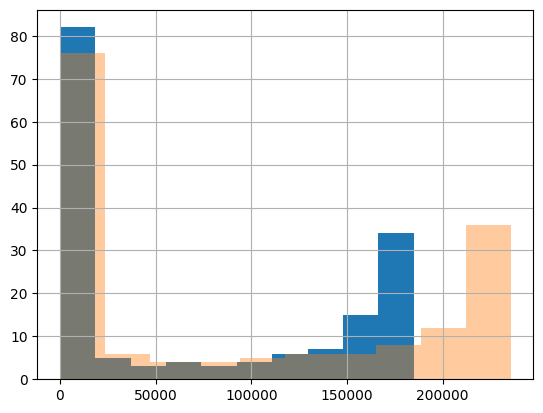

In [38]:
german_df["cumulative_cases"].hist()
italy_df["cumulative_cases"].hist(alpha = 0.4)

In [39]:
german_italy = pd.merge(german_df, italy_df, on = "date")
# np.argmax(abs(german_italy["cumulative_cases_x"] - german_italy["cumulative_cases_y"]) > 10000) encontrar la posicion
german_italy[abs(german_italy["cumulative_cases_x"] - german_italy["cumulative_cases_y"]) > 10000].min()

location_x                                  Germany
date                            2020-03-12 00:00:00
new_cases_x                                       0
new_deaths_x                                      0
population_x                             83783945.0
aged_65_older_percent_x                      21.453
gdp_per_capita_x                          45229.245
hospital_beds_per_thousand_x                    8.0
cumulative_cases_x                             1567
location_y                                    Italy
new_cases_y                                     177
new_deaths_y                                     50
population_y                             60461828.0
aged_65_older_percent_y                      23.021
gdp_per_capita_y                          35220.084
hospital_beds_per_thousand_y                   3.18
cumulative_cases_y                            12462
dtype: object

### 2) Observe la suma acumulativa del número de casos en Italia entre el 28-02-2020 y el 20-03-2020. Ajuste una función exponencial de la forma $y = Ae^{Bx}$ para expresar la suma acumulativa de los casos en función de los días pasados para minimizar el cuadrado de la perdida. ¿Cuál es la diferencia entre la curva exponencial y el número de total de casos para el 20-03-2020?

In [40]:
italy_feb_march = italy_df[(italy_df["date"] >= "2020-02-28") & (italy_df["date"] <= "2020-03-20")]

<Axes: >

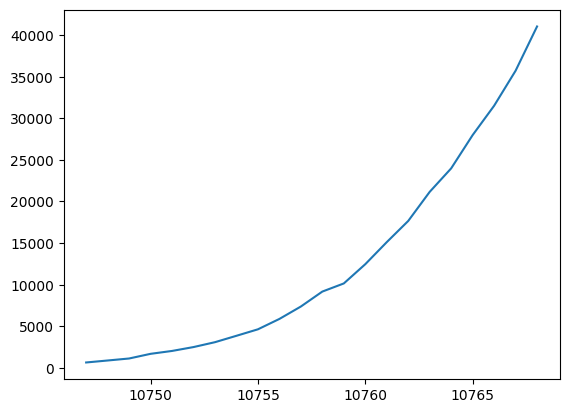

In [41]:
italy_feb_march["cumulative_cases"].plot()

$ln(Y) = log(A) + Bx$

In [42]:
italy_feb_march["log_cumulative_cases"] = np.log(italy_feb_march["cumulative_cases"])

C:\Users\usuario\AppData\Local\Temp\ipykernel_30360\272971642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_feb_march["log_cumulative_cases"] = np.log(italy_feb_march["cumulative_cases"])


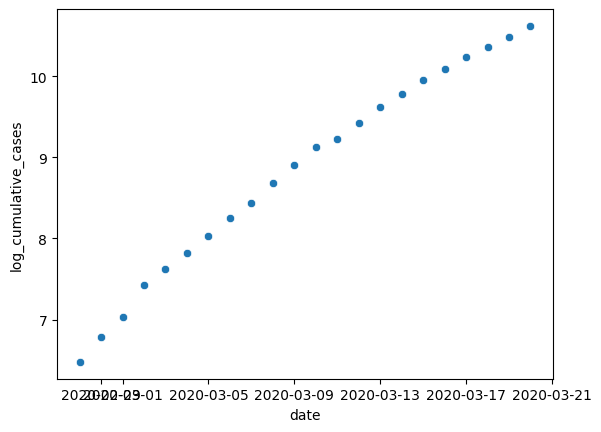

In [43]:
sns.scatterplot(x = "date", y = "log_cumulative_cases", data = italy_feb_march);

In [44]:
np.diff(italy_feb_march["log_cumulative_cases"])

array([0.31199938, 0.23922969, 0.40369048, 0.18685046, 0.20610331,
       0.210757  , 0.2223015 , 0.18370301, 0.23821491, 0.22602907,
       0.21805946, 0.10121981, 0.20530884, 0.19287129, 0.15574689,
       0.18066862, 0.12524933, 0.15426982, 0.11868803, 0.12533676,
       0.13891059])

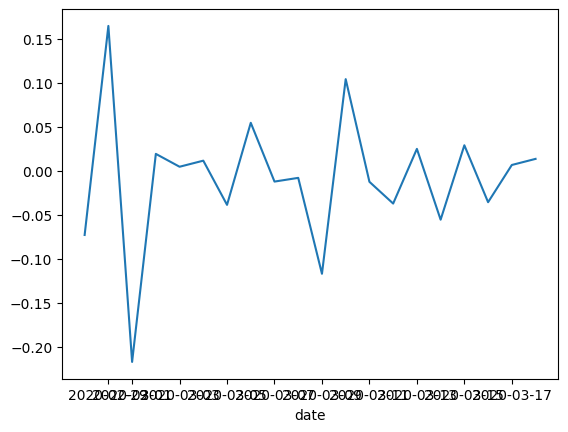

In [45]:
dif1 = np.diff(italy_feb_march["log_cumulative_cases"])
sns.lineplot(x = italy_feb_march["date"][:-2], y = np.diff(dif1));

In [46]:
italy_feb_march['ts'] = italy_feb_march.date.astype('int64') // 10**9
italy_feb_march['ts'] -= italy_feb_march['ts'].min()

C:\Users\usuario\AppData\Local\Temp\ipykernel_30360\671213582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_feb_march['ts'] = italy_feb_march.date.astype('int64') // 10**9
C:\Users\usuario\AppData\Local\Temp\ipykernel_30360\671213582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_feb_march['ts'] -= italy_feb_march['ts'].min()


In [47]:
# Kaggle
# Da orden numérico a las fechas
italy_feb_march['ts'] = italy_feb_march.date.astype('int64') // 10**9
italy_feb_march['ts'] -= italy_feb_march['ts'].min()
italy_feb_march.ts

C:\Users\usuario\AppData\Local\Temp\ipykernel_30360\1751525778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_feb_march['ts'] = italy_feb_march.date.astype('int64') // 10**9
C:\Users\usuario\AppData\Local\Temp\ipykernel_30360\1751525778.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_feb_march['ts'] -= italy_feb_march['ts'].min()


10747          0
10748      86400
10749     172800
10750     259200
10751     345600
10752     432000
10753     518400
10754     604800
10755     691200
10756     777600
10757     864000
10758     950400
10759    1036800
10760    1123200
10761    1209600
10762    1296000
10763    1382400
10764    1468800
10765    1555200
10766    1641600
10767    1728000
10768    1814400
Name: ts, dtype: int64

In [48]:
np.linspace(1, 22, 22)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22.])

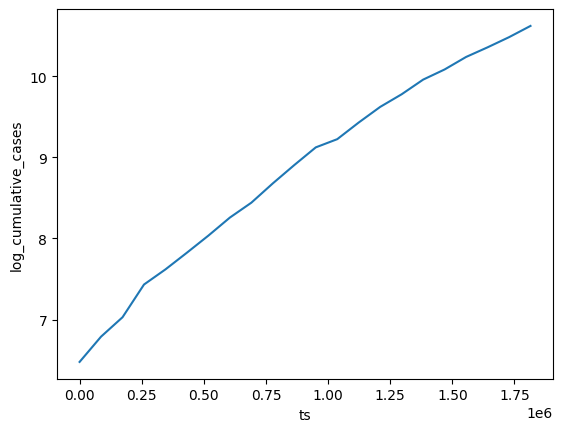

In [49]:
sns.lineplot(x = italy_feb_march["ts"], y = "log_cumulative_cases", data = italy_feb_march);

In [50]:
p = np.polyfit(x = np.linspace(1, 22, 22), y = italy_feb_march["log_cumulative_cases"], deg = 1)
print(p)

[0.19398565 6.60641925]


C:\Users\usuario\AppData\Local\Temp\ipykernel_30360\121629781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  italy_feb_march["y_fitted"] = y_fitted


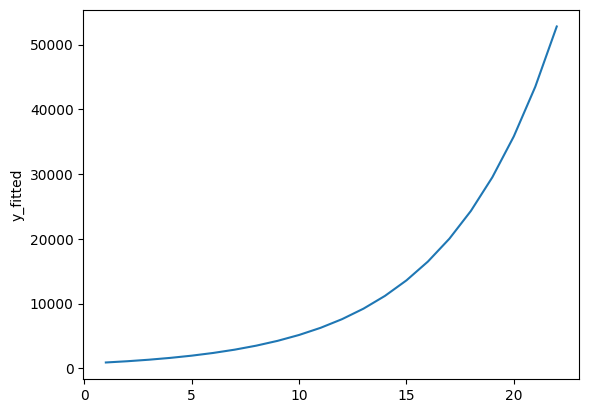

In [51]:
y_fitted = np.exp(p[1]) * np.exp(p[0] * np.linspace(1, 22, 22))
italy_feb_march["y_fitted"] = y_fitted
sns.lineplot(x = np.linspace(1, 22, 22), y = "y_fitted", data = italy_feb_march);

In [52]:
x = italy_feb_march[["cumulative_cases", "y_fitted"]]
x["Diff"] = abs(italy_feb_march["cumulative_cases"] - italy_feb_march["y_fitted"])
x

C:\Users\usuario\AppData\Local\Temp\ipykernel_30360\3565732294.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Diff"] = abs(italy_feb_march["cumulative_cases"] - italy_feb_march["y_fitted"])


,cumulative_cases,y_fitted,Diff
10747,650,898.210903,248.210903
10748,888,1090.498866,202.498866
10749,1128,1323.951616,195.951616
10750,1689,1607.381664,81.618336
10751,2036,1951.488092,84.511908
10752,2502,2369.260431,132.739569
10753,3089,2876.468995,212.531005
10754,3858,3492.260188,365.739812
10755,4636,4239.879256,396.120744
10756,5883,5147.547759,735.452241


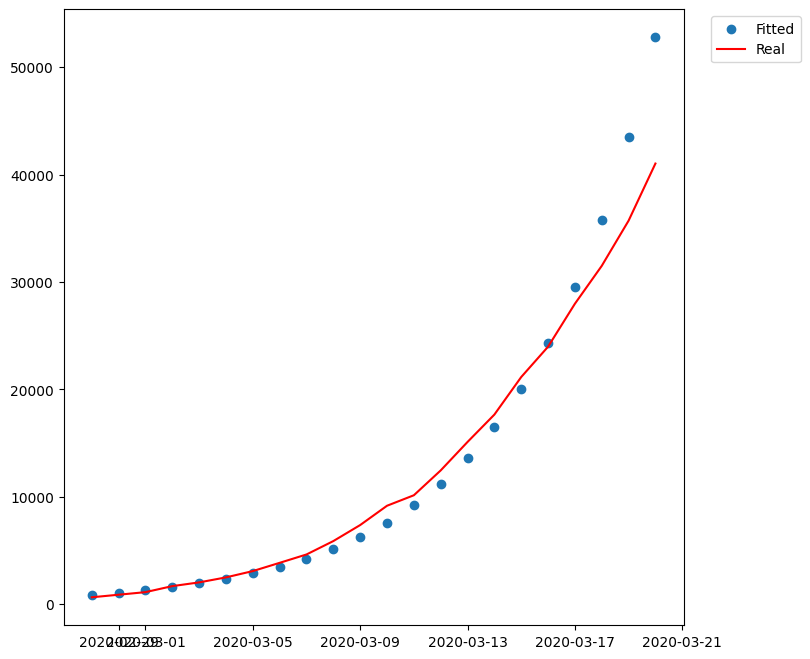

In [53]:
fig, ax = plt.subplots(figsize = (8, 8))
plt.scatter("date", "y_fitted", data = italy_feb_march)
plt.plot("date", "cumulative_cases", data = italy_feb_march, c = "red")
plt.legend(["Fitted", "Real"], loc = "upper right", bbox_to_anchor = (1.20, 1))
plt.show;

### 3) ¿Qué país tiene la tercera posicion en indice de muerte más alto?
### Indice de muerte = Total de muertes / Total de habitantes

In [54]:
covid

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN


In [55]:
aux_rate = covid.groupby("location").agg({"new_deaths": "sum", "population": "mean"})
aux_rate["rate"] = aux_rate["new_deaths"]/aux_rate["population"]*1000000
aux_rate.sort_values(ascending = False, by = "rate")

,new_deaths,population,rate
location,,,
San Marino,42,33938.0,1237.550828
Belgium,9619,11589616.0,829.967102
Andorra,51,77265.0,660.066007
United Kingdom,40883,67886004.0,602.230174
Spain,27136,46754783.0,580.389818
...,...,...,...
French Polynesia,0,280904.0,0.000000
Fiji,0,896444.0,0.000000
Mongolia,0,3278292.0,0.000000


### 4) Cuál es el estadístico F para las siguientes afirmaciones:
* Los países en los cuales el 20% de la población tienen más de 65 años posee una tasa de mortalidad superior a 50 por millon de habitantes (ignore los países donde no haya información suficiente).


In [91]:
countries_20_ab65 = covid[covid["aged_65_older_percent"] > 20]
aux_aged65 = aux_rate[aux_rate.index.isin(countries_20_ab65.location.unique())]
aux_aged65_50 = aux_aged65[aux_aged65["rate"] > 50]

from sklearn.metrics import f1_score
y_pred = [1] * len(aux_aged65)
y_true = [1] * len(aux_aged65_50) + [0] * (len(aux_aged65) - len(aux_aged65_50))
f1_score(y_true, y_pred)


#from sklearn.metrics import f1_score
#y_pred = [1] * len(country_aged_65_over_20_percent)
#y_true = [1] * len(country_aged_65_over_20_percent_death_rate_over_50_per_million) + [0] * (len(country_aged_65_over_20_percent) - len(country_aged_65_over_20_percent_death_rate_over_50_per_million))
#f1_score(y_true, y_pred)

0.7272727272727273

### 5) ¿Cuál es la probabilidad de que un país tenga un GDP mayor a 10000 dado que tiene al menos 5 camas por cada 1000 habitantes?

In [93]:
covid.head()

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5


In [110]:
covid_grouped = covid.groupby("location")[["gdp_per_capita", "hospital_beds_per_thousand"]].agg("first").dropna()
intersect = covid_grouped[(covid_grouped["gdp_per_capita"] > 10000) & (covid_grouped["hospital_beds_per_thousand"] >= 5)]
given = covid_grouped[covid_grouped["hospital_beds_per_thousand"] >= 5]
prob = intersect.shape[0]/given.shape[0]
prob

0.8846153846153846

In [128]:
np.random.choice(["B", "D"])

'B'